#　美容室の口コミデータ解析
## 1. 最初に円グラフや棒グラフを用いて可視化する。
## 2. その後形態素解析を行いクラスタリングやwordcloud,tsne,デンドログラムで可視化する

## 1.最初に円グラフや棒グラフを用いて可視化する。

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
df = pd.read_csv('美容室口コミデータ.csv')
df['count'] = 1 # 棒グラフの可視化の時に用いる
df.head()

,性別,年齢,職業,予約,施術,口コミ,店名,count
0,女性,10代後半,学生,学割U24【平日限定】カット+カラー \15900→\5000 カット、カラー,カット、カラー,店内は広くはありませんが、お洒落で雰囲気も良かったです。担当スタイリストさんは、自分の中での...,A店,1
1,女性,40代,会社員,カット+Tr \7100→\4650 カット、トリートメント,カット、トリートメント,髪質やはえ癖を考慮したうえで、こちらの希望するスタイルにしていただきました。説明も分かりやす...,A店,1
2,女性,20代前半,会社員,カット+カラー \15500→\11000 TAKUYA・KAZUKI 利用不可 ...,NaN,とにかく明るくしたい！といったぼんやりしたイメージで丸投げしてしまったのですが、ばっちり私に...,A店,1
3,男性,30代前半,会社員,【平日限定】カット+カラー+ロイヤルTr\15900→\6980 カット、カラー、トリートメント,カット、カラー、トリートメント,満足でした,A店,1
4,女性,20代後半,NaN,【平日限定】カット+カラー+ロイヤルTr\15900→\6980 カット、カラー、トリートメント,カット、カラー、トリートメント,仕事終わりに行きましたがリフレッシュできました。ありがとうございました。,A店,1


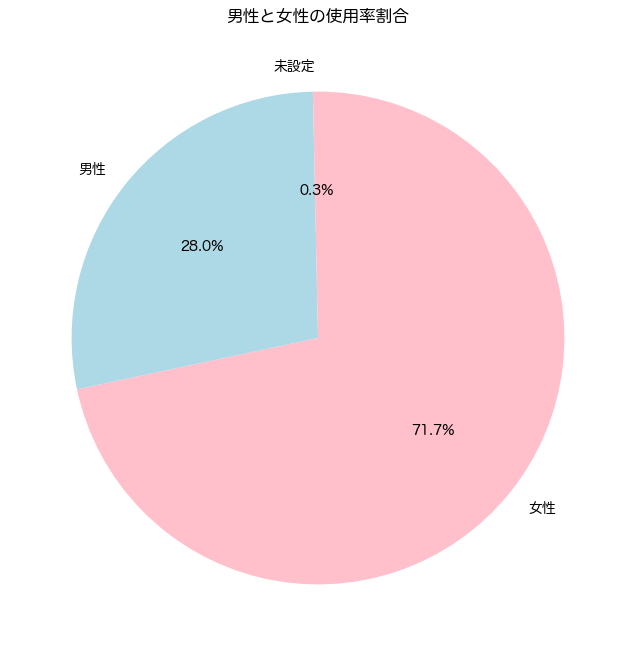

In [2]:
category_counts = df['性別'].value_counts()
colors = ['pink', 'lightblue']
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.title('男性と女性の使用率割合')
plt.show()

#### 全体の割合が約　女性:男性=7:3だとわかる

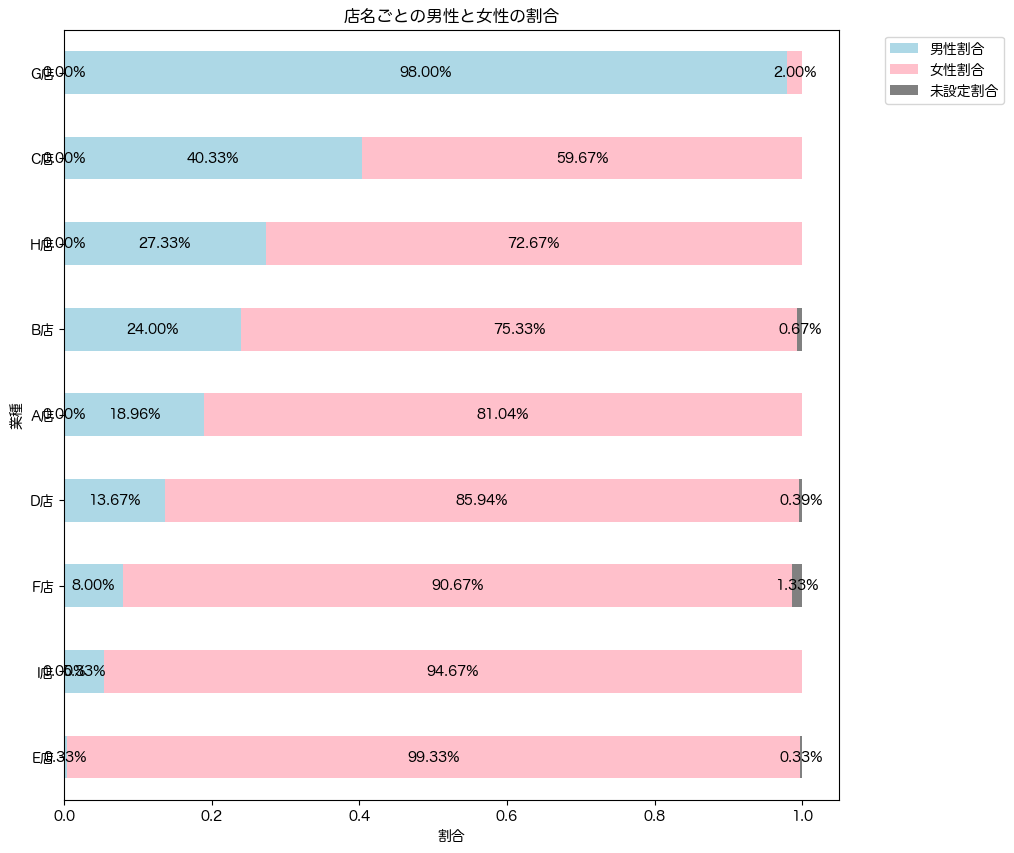

In [3]:
pivot_table = df.pivot_table(index='店名', columns='性別', values='count', aggfunc='sum').fillna(0)
pivot_table['合計'] = pivot_table['女性'] + pivot_table['男性'] + pivot_table['未設定']
pivot_table['女性割合'] = pivot_table['女性'] / pivot_table['合計']
pivot_table['男性割合'] = pivot_table['男性'] / pivot_table['合計']
pivot_table['未設定割合'] = pivot_table['未設定'] / pivot_table['合計']
pivot_table = pivot_table.sort_values('男性割合')
pivot_table = pivot_table[['男性割合', '女性割合', '未設定割合']]

colors = ['lightblue', 'pink', 'gray']
fig, ax = plt.subplots(figsize=(10, 10))
ax = pivot_table[['男性割合', '女性割合', '未設定割合']].plot(kind='barh', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f'{width*100:.2f}%', (x+width / 2, y + height / 2), ha='center', va='center')

plt.title('店名ごとの男性と女性の割合')
plt.xlabel('割合')
plt.ylabel('業種')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

#### 店舗ごとの性別ごとによる使用率を分けた
#### 店舗によって男性と女性の使用率割合が全然違うことが見られる

## A店の施術メニューごとの男性女性の割合

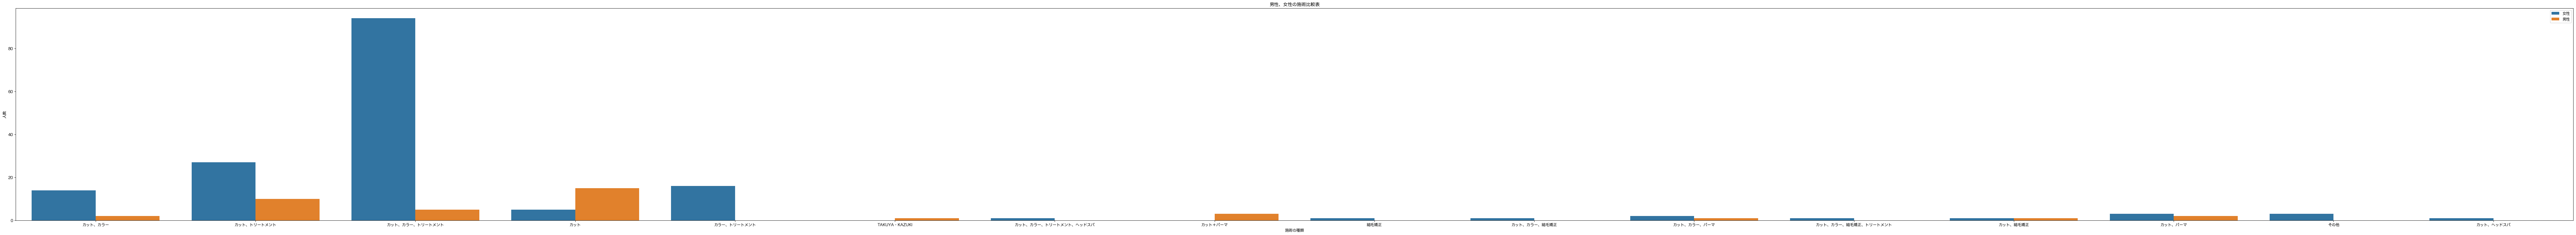

In [4]:
A_shop = df[df['店名'] == 'A店']
plt.figure(figsize=(120, 10))

sns.countplot(x='施術', hue='性別', data=A_shop)
plt.xlabel('施術の種類')
plt.ylabel('人数')
plt.title('男性、女性の施術比較表')
plt.legend()
plt.show()

#### A店舗の性別ごとの施術メニューについて可視化したものである(※女性が青色、　男性がオレンジ色であることに注意)
#### 男性はカットが人気メニューであり、カット＋カラーやトリートメントが人気メニューであることがわかる

## A店の施術ごとのメニューの職業の割合

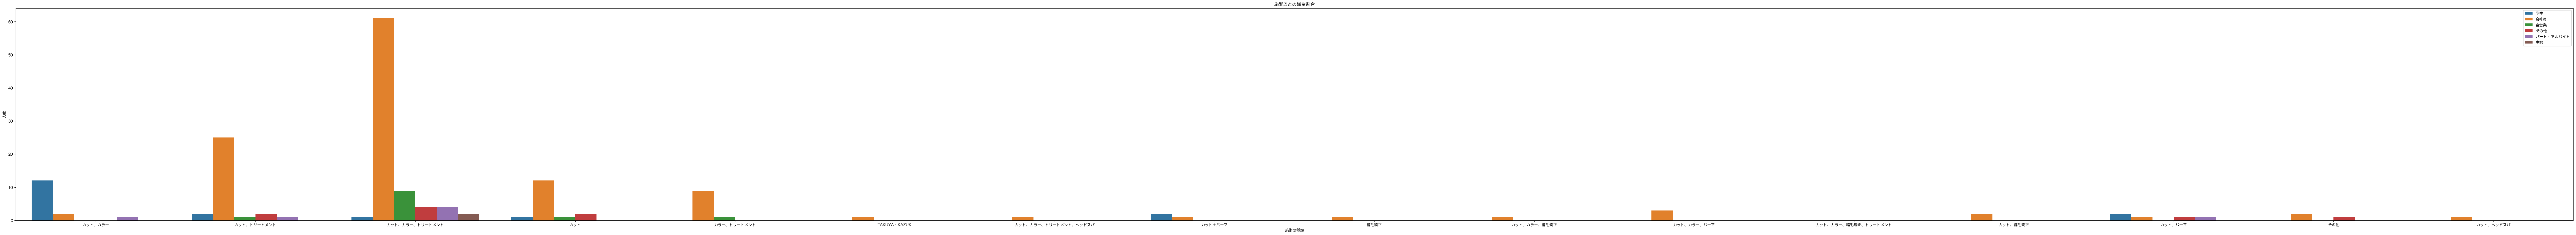

In [5]:
plt.figure(figsize=(120, 10))

sns.countplot(x='施術', hue='職業', data=A_shop)
plt.xlabel('施術の種類')
plt.ylabel('人数')
plt.title('施術ごとの職業割合')
plt.legend()
plt.show()

#### A店舗の職業ごとの施術メニューについて可視化したものである
#### 学生はカット＋カラーが人気あり、会社員はカット＋トリートメントかカット＋トリートメント＋カラーが人気メニューであることがわかる。
#### 学生はカラーをしたい人が多く髪質を気にしないのに対し、会社員は髪質を気にしておりトリートメントをしていることがわかる

## 学生人気手術メニュー

In [6]:
student = df[df['職業'] == '学生']
student[['性別', '施術', 'count']].groupby(['性別', '施術']).sum().sort_values('count', ascending=False).head(10)

count
性別 施術                                       
男性 カット、パーマ                                66
   カット                                    57
女性 カット、カラー                                56
   カット                                    42
   カット、カラー、トリートメント                        27
男性 カット、カラー                                22
女性 カット、トリートメント                            20
男性 カット、カラー、パーマ、縮毛矯正、トリートメント、ヘッドスパ、その他     16
女性 ヘアセット                                  12
   カット、縮毛矯正                               10

#### 学生の性別ごとの人気メニューである
#### 男性はカットやパーマが人気である。　女性はカットよりもカット＋カラーをしたい人が多い傾向がある

## 全体の人気施術メニュー

In [7]:
df[['性別', '施術', 'count']].groupby(['性別', '施術']).sum().sort_values('count', ascending=False).head(10)

count
性別 施術                                       
女性 カット、カラー、トリートメント                       375
   カット                                   241
   カット、カラー                               239
男性 カット                                   231
女性 カット、トリートメント                           160
男性 カット、パーマ                               138
女性 ヘアセット                                  63
男性 カット、カラー、パーマ、縮毛矯正、トリートメント、ヘッドスパ、その他     54
女性 カラー、トリートメント                            53
   \19.580→\13.900\n[施術メニュー]              49

#### 全体の性別ごとの人気施術メニューである
#### 下記の職業ごとのデータ数を見ると会社員の使用率が多いため、女性はカット、カラー、トリートメントが人気だとわかる

## 職業ごとのデータ数

In [8]:
df[['職業', 'count']].groupby('職業').sum().sort_values('count', ascending=False)

,count
職業,
会社員,1067
学生,461
その他,121
パート・アルバイト,118
主婦,116
自営業,92


## 職業＆年齢ごとのデータ数

In [9]:
df[['職業', '年齢', 'count']].groupby(['職業', '年齢']).sum()

count
職業        年齢           
その他       10代後半       3
          20代前半      17
          20代後半      28
          30代前半      10
          30代後半      12
          40代        16
          50代        21
          60代         6
          70代～        8
パート・アルバイト 10代後半       2
          20代前半      21
          20代後半      17
          30代前半      10
          30代後半      12
          40代        30
          50代        24
          60代         2
主婦        10代後半       1
          20代前半       1
          20代後半      10
          30代前半      17
          30代後半      13
          40代        33
          50代        35
          60代         5
          70代～        1
会社員       10代後半       9
          20代前半     205
          20代後半     313
          30代前半     185
          30代後半     104
          40代       149
          50代        84
          60代        18
学生        10代後半     202
          20代前半     231
          20代後半      11
          30代前半       2
          30代後半       2
          40代         2
          未設定         3
          ～10代前半      8
自営業       20代前半       8
          20代後半      20
          30代前半      23
          30代後半      11
          40代        17
          50代         8
          60代         5

## 2.形態素解析を行いクラスタリングやwordcloud,tsne,デンドログラムで可視化する

## df['口コミ']のデータに欠損値があるため、除外する&ライブラリの読み込み

In [10]:
import MeCab
import tqdm
import warnings
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

warnings.filterwarnings('ignore')

df = df.dropna(subset=['口コミ']).reset_index()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Tfidfを用いて口コミ情報を数字に置き換える

In [11]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['口コミ'])

## エルボー法を用いてクラスターの最適な数を可視化する

100%|██████████| 50/50 [00:20<00:00,  2.45it/s]


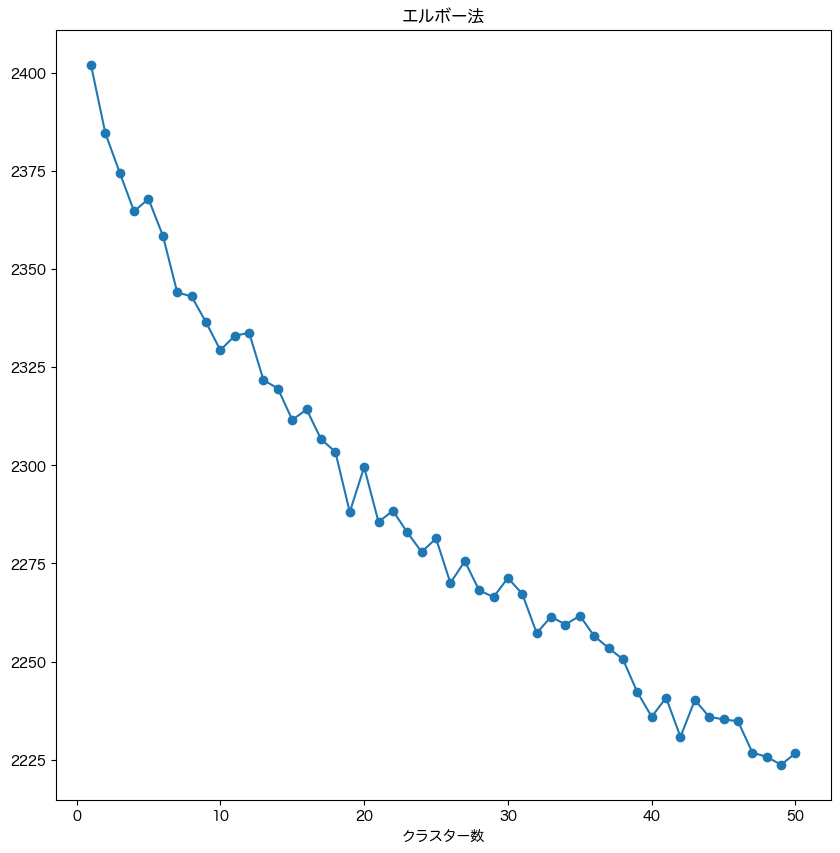

In [12]:
distortions = []
num = 50

for i in tqdm.tqdm(range(1, num+1)):
    model = KMeans(n_clusters=i, init='k-means++',
                   n_init=10, max_iter=300, random_state=50)
    
    model.fit(X)
    
    distortions.append(model.inertia_)
    
plt.figure(figsize=(10, 10))
plt.plot(range(1, num+1), distortions, marker='o')
plt.title('エルボー法')
plt.xlabel('クラスター数')
plt.show()

## 今回はクラスター数を４にして実行する

In [13]:
clusters_num = 4
km_model = KMeans(n_clusters=clusters_num, random_state=50)
km_model.fit(X)
df['label'] = km_model.labels_
df['label'].value_counts()

0    1765
3     392
2     196
1      56
Name: label, dtype: int64

## 口コミの名詞を取り出して、クラスターごとをwordcloudで可視化する

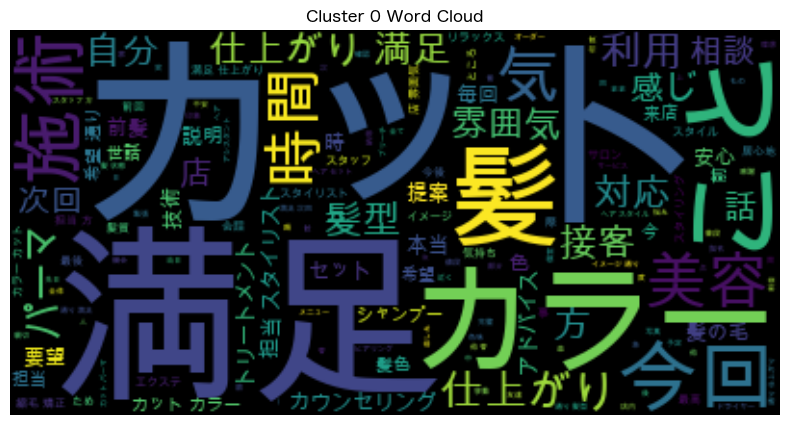

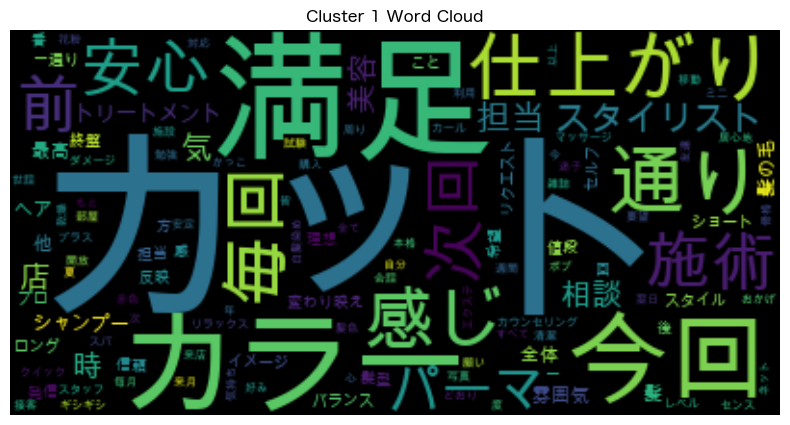

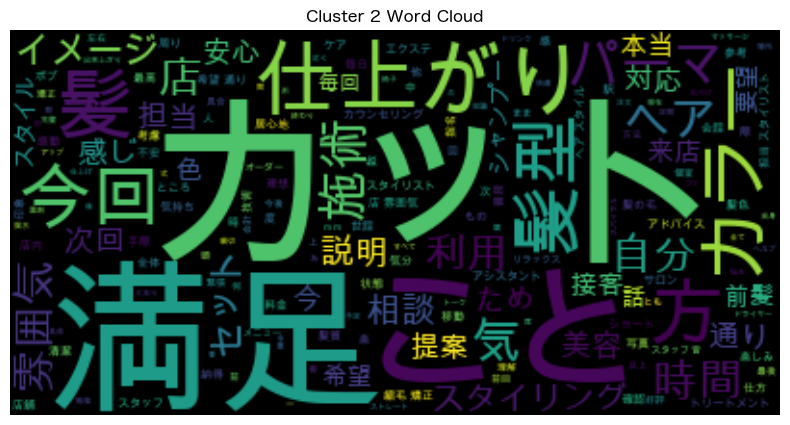

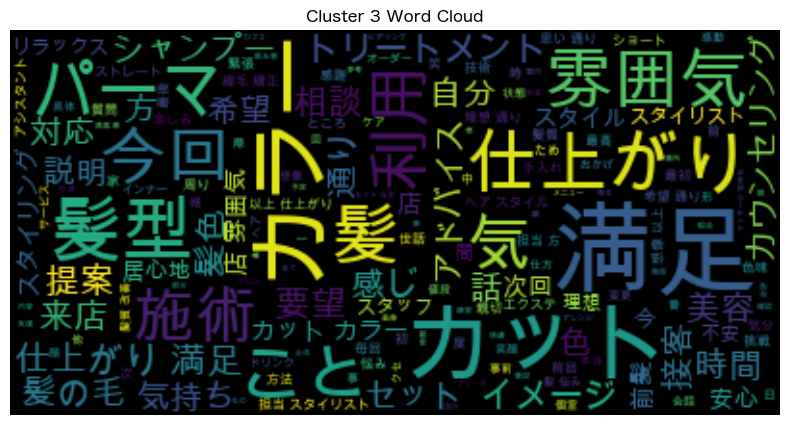

In [14]:
m = MeCab.Tagger('-Owakati')
for cluster_num in range(clusters_num):
    cluster_meishi_list = []
    cluster_doushi_list = []
    cluster_keiyoushi_list = []
    for i in range(len(df)):
        if df['label'][i] == cluster_num:
            node = m.parseToNode(df['口コミ'][i])
            while node:
                if node.feature.split(',')[0] == '名詞':
                    cluster_meishi_list.append(node.surface)
                elif node.feature.split(',')[0] == '動詞':
                    cluster_doushi_list.append(node.feature.split(',')[7])
                elif node.feature.split(',')[0] == '形容詞':
                    cluster_keiyoushi_list.append(node.feature.split(',')[7])
                    
                node = node.next
                
    cluster_text = ' '.join(cluster_meishi_list)
    wordcloud = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf').generate(cluster_text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {cluster_num} Word Cloud')
    plt.axis('off')
    plt.show()

#### 満足やカットが多く分かりずらい

## クラスターごとにどんな口コミが集まっているのか口コミ情報見てみる

In [15]:
for cluster_num in range(clusters_num):
    print(f'クラスター{cluster_num}の口コミ', df[df['label'] == cluster_num]['口コミ'])

クラスター0の口コミ 0       店内は広くはありませんが、お洒落で雰囲気も良かったです。担当スタイリストさんは、自分の中での...
2       とにかく明るくしたい！といったぼんやりしたイメージで丸投げしてしまったのですが、ばっちり私に...
3                                                   満足でした
5       2度目の利用。前回同様カラーはこちらの曖昧な希望に対し、たくさん検討して頂いた結果、ブリーチ...
6                             理想の形と色にしてもらいました！ぜひまた行きたいです。
                              ...                        
2402                   相談しながらカラーなど決められるので助かります。仕上がりも満足です。
2403          子供のカットお願いしました。お店は大変賑わっていました。丁寧に仕上げていただきました。
2406    縮毛矯正とカットでしたが、とても素敵に仕上げていたあだきました。ヘアアイロンやドライヤーのや...
2407                                         丁寧に対応してくれました
2408    今回初めて通ったものです！写真の通り雰囲気がとても良く、清潔感溢れる空気でした。それぞれお客...
Name: 口コミ, Length: 1765, dtype: object
クラスター1の口コミ 53      前のお店の時からずっとお世話になっています。曖昧なお願いにも丁寧に汲み取って理想以上の仕上が...
219            いつも通り丁寧に施術していただき、とても満足しています。いつもありがとうございます。
230                                        いつもありがとうございます。
242        いつもありがとうございます！カット後の髪も、カラーもいい感じです。またよろしくお願いします！
295     いつもありがとうございます！通い始めてから約1年が経ち、髪綺麗になったね！と周りの方に言われ...
373        

#### クラスター０は心配な方やぼんやりしており、それを相談して解決する。よって顧客に対して丁寧な対応をしていることがわかる。
#### クラスター１は「いつもありがとうございます。」が多いことから固定客であることがわかる。
#### クラスター２はうまく仕分けで切れていない感じがする。
#### クラスター３はクラスター０と似ている。よって顧客に対して丁寧な対応をしていることがわかる。

## 店舗ごとのクラスターの割合を表示する

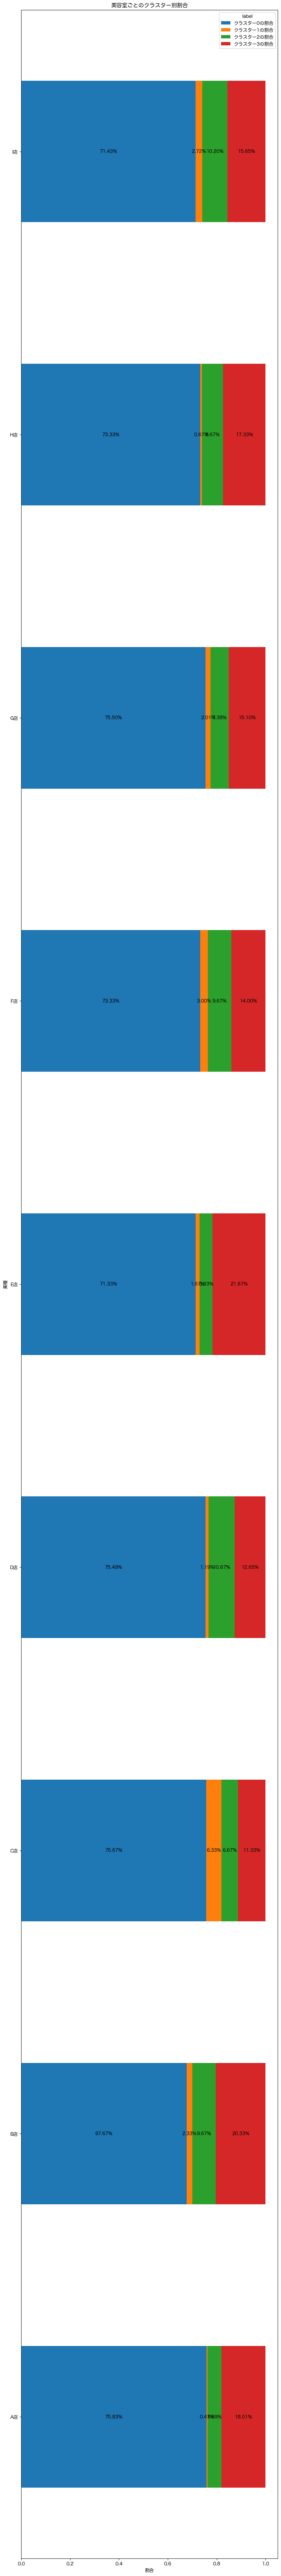

In [16]:
pivot_table = df.pivot_table(index='店名', columns='label', values='count', aggfunc='sum')
pivot_table['合計'] = pivot_table[0] + pivot_table[1] + pivot_table[2] + pivot_table[3]
pivot_table['クラスター0の割合'] = pivot_table[0] / pivot_table['合計']
pivot_table['クラスター1の割合'] = pivot_table[1] / pivot_table['合計']
pivot_table['クラスター2の割合'] = pivot_table[2] / pivot_table['合計']
pivot_table['クラスター3の割合'] = pivot_table[3] / pivot_table['合計']

ax = pivot_table[['クラスター0の割合', 'クラスター1の割合', 'クラスター2の割合', 'クラスター3の割合']].plot(kind='barh',
                                                                           stacked=True, figsize=(10,100))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f'{width*100:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center')
    
plt.title('美容室ごとのクラスター別割合')
plt.xlabel('割合')
plt.ylabel('業種')

plt.show()    

## tsneによる可視化

100%|██████████| 2409/2409 [00:00<00:00, 4009.70it/s]


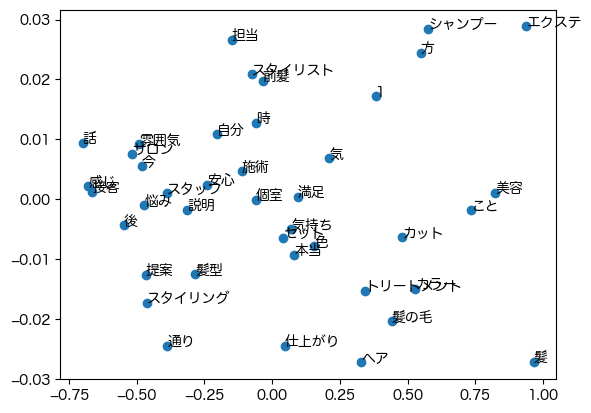

In [17]:
m = MeCab.Tagger('-Owakati')
meishi_list = []
doushi_list = []
keiyoushi_list = []

for i in tqdm.tqdm(range(len(df['口コミ']))):
    node = m.parseToNode(df['口コミ'][i])
    while node:
        if node.feature.split(',')[0] == '名詞':
            meishi_list.append(node.surface)
        elif node.feature.split(',')[0] == '動詞':
            doushi_list.append(node.feature.split(',')[7])
        elif node.feature.split(',')[0] == '形容詞':
            keiyoushi_list.append(node.feature.split(',')[7])
            
        node = node.next

        
        
text = [meishi_list]

model = Word2Vec(text, min_count=2)

def draw_word_scatter(word, topn=30):

    words = [x[0] for x in sorted(model.wv.most_similar(word, topn=topn))]
    words.append(word)

    vecs = [model.wv[word] for word in words]

    draw_scatter_plot(vecs, words)

def draw_scatter_plot(vecs, tags):
    
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)

    fig, ax = plt.subplots()
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]

    ax.scatter(x, y)

    for i, txt in enumerate(tags):
        ax.annotate(txt, (coords[i][0], coords[i][1]))

    plt.show()

draw_word_scatter('カラー', topn=40)

#### カラーの近くにはトリートメントや髪の毛、カットなどが近くにあることがわかる

## デンドログラムによる可視化

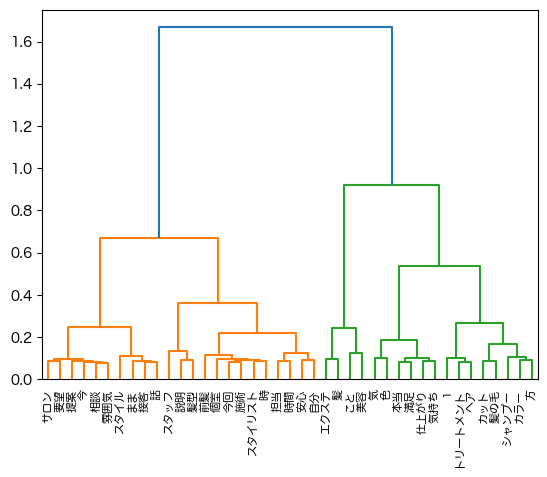

In [18]:
def draw_similar_word_dendrogram(word, topn=30):

    words = [x[0] for x in sorted(model.wv.most_similar(word, topn=topn))]
    words.append(word)

    vecs = [model.wv[word] for word in words]

    df = pd.DataFrame(vecs, index=words)
    row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
    dendrogram(row_clusters, labels=words)
    plt.show()

draw_similar_word_dendrogram('満足', topn=40)

#### 満足には大きく２つに分かれており、左側は相談することであったり、安心が満足につながる。
#### 右側は仕上がりやカット、カラーなどが満足につながる。